In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("C:/Users/user/Desktop/padaii/Datasets/spam_excel.xlsx")
data

,label,sms_message,num_character
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,160
5569,ham,Will ﾌ_ b going to esplanade fr home?,37
5570,ham,"Pity, * was in mood for that. So...any other s...",57
5571,ham,The guy did some bitching but I acted like i'd...,125


In [3]:
data.duplicated().sum()

403

In [4]:
data.drop_duplicates(inplace=True)
data.shape

(5170, 3)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['label']=encoder.fit_transform(data['label'])

In [6]:
data

,label,sms_message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5568,1,This is the 2nd time we have tried 2 contact u...,160
5569,0,Will ﾌ_ b going to esplanade fr home?,37
5570,0,"Pity, * was in mood for that. So...any other s...",57
5571,0,The guy did some bitching but I acted like i'd...,125


# EDA

In [7]:
data['label'].value_counts()

0    4517
1     653
Name: label, dtype: int64

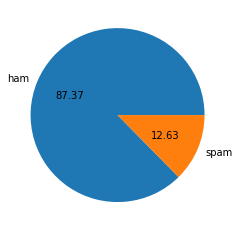

In [8]:
plt.pie(data['label'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [9]:
data[data['label']==0][["num_character"]].describe()

,num_character
count,4517.000000
mean,70.419305
std,56.329266
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


In [10]:
data[data['label']==1][["num_character"]].describe()

,num_character
count,653.000000
mean,137.471669
std,30.019848
min,13.000000
25%,131.000000
50%,148.000000
75%,157.000000
max,223.000000


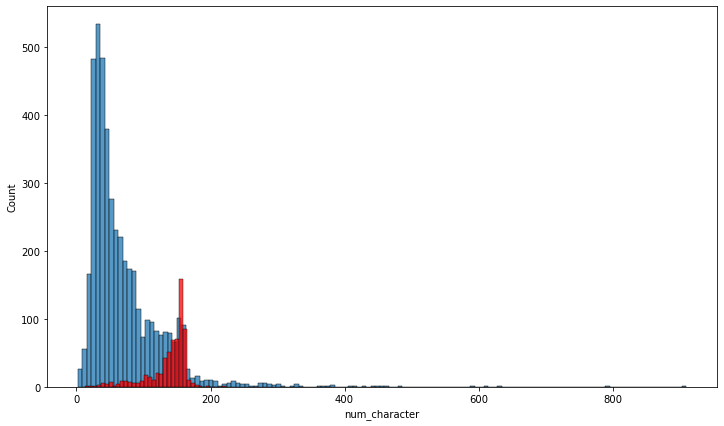

In [11]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.histplot(data[data['label']==0]['num_character'])
sns.histplot(data[data['label']==1]['num_character'],color='r')
plt.show()

# Preprocessing

In [12]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=text.split()
    
    y=[]
    for i in text:
        if i.isalnum():          # keeping only alnum(alfa numeric values)
            y.append(i)

    text=y.copy()
    y.clear()
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [13]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong avail bugi n great world la e cine got amor'

In [14]:
data['sms_message']=data['sms_message'].astype(str)
data['transformed_text']=data['sms_message'].apply(transform_text)

In [15]:
data.head()

,label,sms_message,num_character,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe live around though


In [16]:
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')

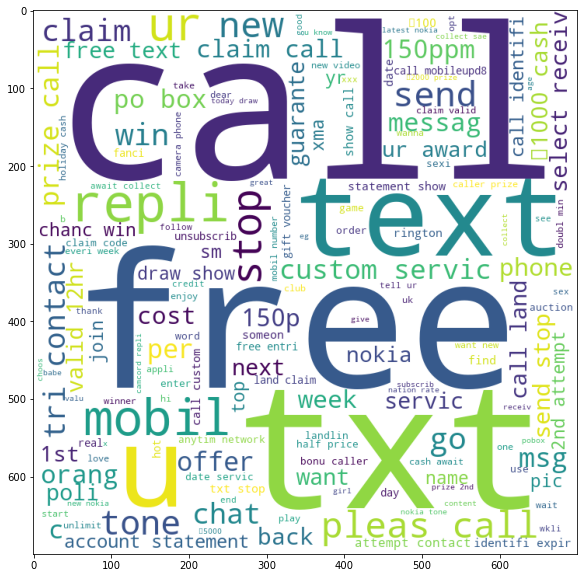

In [17]:
spam_wc=wc.generate(data[data['label']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

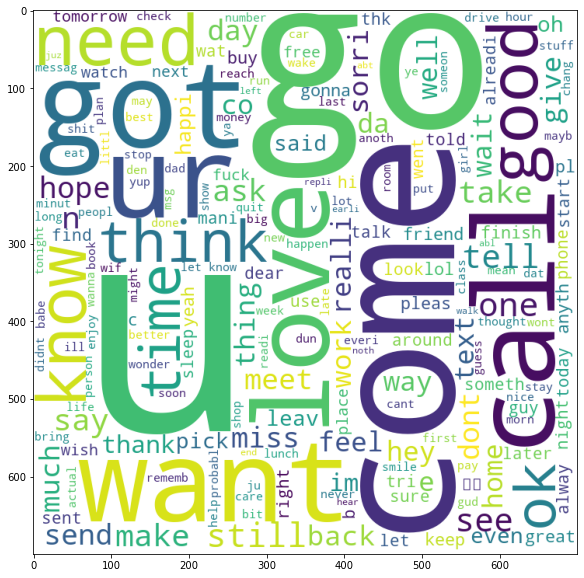

In [18]:
ham_wc=wc.generate(data[data['label']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

# Model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [20]:
x=tf.fit_transform(data['transformed_text']).toarray()
x.shape

(5170, 3000)

In [21]:
y=data['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=2)

In [27]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [28]:
gnb=GaussianNB()
mlnb=MultinomialNB()
blnb=BernoulliNB()

In [29]:
gnb.fit(xtrain,ytrain)
ypred1=gnb.predict(xtest)
print(accuracy_score(ytest,ypred1),'\n')
print(confusion_matrix(ytest,ypred1),'\n')
print(precision_score(ytest,ypred1),'\n')

0.8027079303675049 

[[728 177]
 [ 27 102]] 

0.3655913978494624 



In [30]:
mlnb.fit(xtrain,ytrain)
ypred2=mlnb.predict(xtest)
print(accuracy_score(ytest,ypred2),'\n')
print(confusion_matrix(ytest,ypred2),'\n')
print(precision_score(ytest,ypred2),'\n')

0.9622823984526112 

[[904   1]
 [ 38  91]] 

0.9891304347826086 



In [31]:
blnb.fit(xtrain,ytrain)
ypred3=blnb.predict(xtest)
print(accuracy_score(ytest,ypred3),'\n')
print(confusion_matrix(ytest,ypred3),'\n')
print(precision_score(ytest,ypred3),'\n')

0.9738878143133463 

[[904   1]
 [ 26 103]] 

0.9903846153846154 



In [32]:
# tfidfvectorizer gives more precision with Multinomial Naive bayes
# Since data is imbalanced,spam=12% n ham=88%, precision matters more than accuracy

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [40]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [42]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
}

In [43]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [44]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9632495164410058, 0.9174311926605505)

In [45]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9632495164410058
Precision -  0.9174311926605505
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9428571428571428
For  NB
Accuracy -  0.9622823984526112
Precision -  0.9891304347826086
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8130841121495327
For  LR
Accuracy -  0.9497098646034816
Precision -  0.9425287356321839
For  RF
Accuracy -  0.9642166344294004
Precision -  1.0
For  AdaBoost
Accuracy -  0.9564796905222437
Precision -  0.92


In [46]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores
                               ,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.964217,1.000000
2,NB,0.962282,0.989130
1,KN,0.905222,0.942857
4,LR,0.949710,0.942529
6,AdaBoost,0.956480,0.920000
0,SVC,0.963250,0.917431
3,DT,0.940039,0.813084
